In [1]:
import pandas as pd 
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
df = pd.read_csv("data/Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.drop("Serial No.",inplace=True,axis=1)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

In [12]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state= 44)

In [17]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
91,299,97,3,5.0,3.5,7.66,0
78,296,95,2,3.0,2.0,7.54,1
471,311,103,3,2.0,4.0,8.09,0
304,313,106,2,2.5,2.0,8.43,0
122,310,106,4,1.5,2.5,8.36,0
...,...,...,...,...,...,...,...
488,322,112,3,3.0,4.0,8.62,1
166,302,102,3,3.5,5.0,8.33,0
87,317,107,2,3.5,3.0,8.28,0
176,329,119,4,4.5,4.5,9.16,1


In [18]:
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [19]:
X_train

array([[ 0.3645856 ,  0.75144881, -0.12137714, ...,  1.07019364,
         0.58021016,  0.85096294],
       [-1.78763166, -1.01477702, -1.85533636, ..., -0.5310936 ,
        -1.46820711, -1.1751393 ],
       [ 1.3115612 ,  1.8754107 ,  0.74560246, ...,  1.07019364,
         1.04795899,  0.85096294],
       ...,
       [ 0.02023084, -0.69364505, -0.98835675, ..., -1.59861843,
        -0.71013143, -1.1751393 ],
       [-0.75456737, -0.85421104, -0.98835675, ...,  0.00266881,
        -0.98432902,  0.85096294],
       [ 1.05329513,  0.91201479,  1.61258207, ...,  1.07019364,
         1.38667365,  0.85096294]], shape=(400, 7))

In [42]:
model = Sequential()

model.add(Dense(20,activation='relu',input_dim = 7))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,021 (3.99 KB)

 Trainable params: 1,021 (3.99 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [48]:
model_metrics = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0045 - val_accuracy: 0.0000e+00 - val_loss: 0.0119
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0043 - val_accuracy: 0.0000e+00 - val_loss: 0.0117
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0041 - val_accuracy: 0.0000e+00 - val_loss: 0.0116
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0041 - val_accuracy: 0.0000e+00 - val_loss: 0.0110
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0039 - val_accuracy: 0.0000e+00 - val_loss: 0.0112
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0038 - val_accuracy: 0.0000e+00 - val_loss: 0.0112
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0037 - val_accuracy: 0.0000e+00 - val_loss: 0.0108
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0

In [49]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [27]:
y_pred

array([[0.96881413],
       [0.43959334],
       [0.24479227],
       [0.6694962 ],
       [0.17643216],
       [0.48122662],
       [0.7036084 ],
       [0.11173269],
       [0.73982894],
       [0.11177373],
       [0.69537115],
       [0.46625522],
       [0.3823414 ],
       [0.60674465],
       [0.43337357],
       [1.0451849 ],
       [0.43376234],
       [0.42569253],
       [0.81806695],
       [0.6889669 ],
       [0.85106325],
       [0.7718309 ],
       [0.3803484 ],
       [0.5219345 ],
       [0.79009783],
       [0.8205836 ],
       [1.2118914 ],
       [0.36542186],
       [0.32536352],
       [0.49508625],
       [0.49454987],
       [0.506418  ],
       [0.6692841 ],
       [0.8137764 ],
       [0.59205484],
       [1.2387105 ],
       [0.77445376],
       [0.62990916],
       [0.11525664],
       [0.93625915],
       [0.6380167 ],
       [0.53050596],
       [0.7089093 ],
       [0.41388622],
       [0.5506307 ],
       [1.4934351 ],
       [0.3887165 ],
       [0.592

In [28]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test,y_pred)

0.6359848529396184

In [51]:
import matplotlib.pyplot as plt

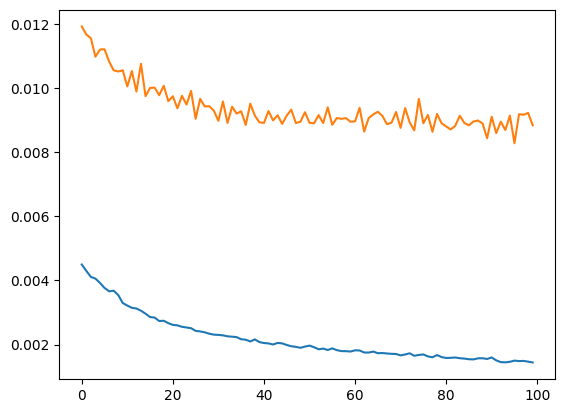

In [52]:
plt.plot(model_metrics.history['loss'])
plt.plot(model_metrics.history['val_loss'])

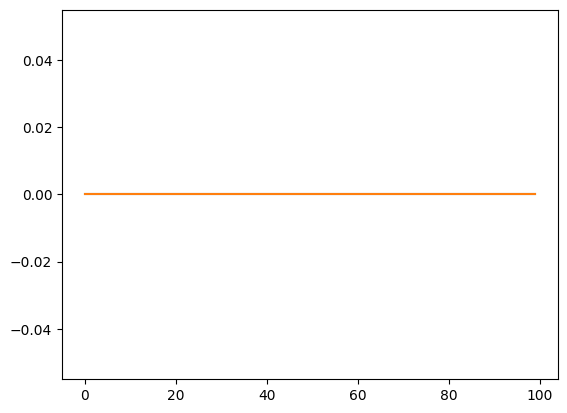

In [53]:
plt.plot(model_metrics.history['accuracy'])
plt.plot(model_metrics.history['val_accuracy'])